/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 42)                  │           1,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              43 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1089
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4935e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1659e-04
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.5075e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.5109e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.7269e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.3069e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.6996e-04
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.1344e-04
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.0406e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.5842e-04
Epoch 15/20
38/38 ━━━━━━━━━━━━━━

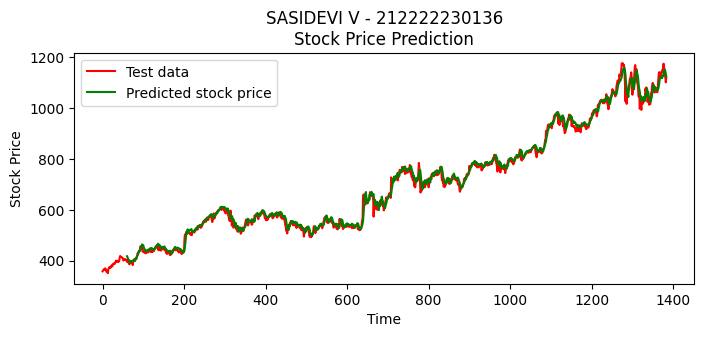

SASIDEVI V
544826.5781143002


In [3]:
##### Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

##### Loading Dataset

dtrain=pd.read_csv('/content/trainset (1).csv')
dtrain.columns
dtrain.head()
dtrainset=dtrain.iloc[:,1:2].values

##### Scaling the Data

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(dtrainset)
training_set_scaled.shape

##### Training the Data

X_train_array = []
y_train_array = []
for i in range(60, 1259):
    X_train_array.append(training_set_scaled[i-60:i,0])
    y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_train.shape

##### Creating Network Model

model = Sequential([layers.SimpleRNN(42,input_shape=(60,1)),layers.Dense(1)])
model.compile(optimizer='adam',loss='mse')
model.summary()
model.fit(X_train1,y_train,epochs=20, batch_size=32)

##### Reading Test Data

dataset_test = pd.read_csv('/content/testset (1).csv')
test_set = dataset_test.iloc[:,1:2].values
test_set.shape

##### Training Test Data

dataset_total = pd.concat((dtrain['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
y_test = []
for i in range(60,1384):
    X_test.append(inputs_scaled[i-60:i,0])
    y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
X_test.shape

##### Ploting Results

predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)
plt.figure(figsize=(8,3))
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test data')
plt.plot(np.arange(60,1384),predicted_stock_price, color='green',label = 'Predicted stock price')
plt.title('SASIDEVI V - 212222230136\nStock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

##### Mean Square Error

from sklearn.metrics import mean_squared_error as mse
print('SASIDEVI V')
print(mse(y_test,predicted_stock_price))
